In [1]:
from zipfile import ZipFile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

import PIL

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
TRAIN_ARCHIVE = '/content/drive/MyDrive/Дипломна_робота/CASIA-HWDB_Train.zip'
TEST_ARCHIVE  = '/content/drive/MyDrive/Дипломна_робота/CASIA-HWDB_Test.zip'

In [4]:
! ls /content/drive/MyDrive/Дипломна_робота

 CASIA-HWDB_Test.zip    model_conv_c.keras   model_dense_1.keras  'Дипломна робота.ipynb'
 CASIA-HWDB_Train.zip   model_conv.keras     model_pool.keras


# Create info tables

In [5]:
# Create a dictionary (character_zip) that maps each unique folder in the archive to a unique integer ID.

with ZipFile(TRAIN_ARCHIVE, 'r') as archive:
  all_files = archive.namelist()

  labels = sorted({file.split('/')[0] for file in all_files if '/' in file})
  nums   = range(0, len(labels))

  character_zip = dict(zip(nums, labels))

print(character_zip)

{0: '一', 1: '七', 2: '三', 3: '上', 4: '下', 5: '不', 6: '东', 7: '么', 8: '九', 9: '习', 10: '书', 11: '买', 12: '了', 13: '二', 14: '五', 15: '些', 16: '亮', 17: '人', 18: '什', 19: '今', 20: '他', 21: '们', 22: '会', 23: '住', 24: '作', 25: '你', 26: '候', 27: '做', 28: '儿', 29: '先', 30: '八', 31: '六', 32: '关', 33: '兴', 34: '再', 35: '写', 36: '冷', 37: '几', 38: '出', 39: '分', 40: '前', 41: '北', 42: '医', 43: '十', 44: '午', 45: '去', 46: '友', 47: '吃', 48: '同', 49: '名', 50: '后', 51: '吗', 52: '呢', 53: '和', 54: '哪', 55: '商', 56: '喂', 57: '喜', 58: '喝', 59: '四', 60: '回', 61: '国', 62: '在', 63: '坐', 64: '块', 65: '多', 66: '大', 67: '天', 68: '太', 69: '她', 70: '好', 71: '妈', 72: '姐', 73: '子', 74: '字', 75: '学', 76: '客', 77: '家', 78: '对', 79: '小', 80: '少', 81: '岁', 82: '工', 83: '师', 84: '年', 85: '店', 86: '开', 87: '影', 88: '很', 89: '怎', 90: '想', 91: '我', 92: '打', 93: '日', 94: '时', 95: '明', 96: '星', 97: '昨', 98: '是', 99: '月', 100: '有', 101: '朋', 102: '服', 103: '期', 104: '本', 105: '机', 106: '来', 107: '杯', 108: '果', 109: '校', 110: '样',

In [6]:
def create_table(directory: str, character_zip: dict):
    with ZipFile(directory, 'r') as archive:
        all_files = archive.namelist()

        data = []

        for file in all_files:
            folder = file.split('/')[0]

            character_id = next((key for key, value in character_zip.items() if value == folder), None)

            if character_id is not None and (file.endswith('.png') or file.endswith('.jpg')):
                file_name = file.split('/')[-1]

                data.append([character_id, folder, file_name])

        df = pd.DataFrame(data, columns=["Character_ID", "Character", "File_Name"])

    return df

In [7]:
train_set = create_table(TRAIN_ARCHIVE, character_zip)
test_set  = create_table(TEST_ARCHIVE, character_zip)

In [8]:
display(train_set, test_set)

,Character_ID,Character,File_Name
0,1,七,1.png
1,1,七,10.png
2,1,七,100.png
3,1,七,101.png
4,1,七,102.png
...,...,...,...
102937,0,一,95.png
102938,0,一,96.png
102939,0,一,97.png
102940,0,一,98.png


,Character_ID,Character,File_Name
0,0,一,1.png
1,0,一,10.png
2,0,一,100.png
3,0,一,101.png
4,0,一,102.png
...,...,...,...
24419,171,高,95.png
24420,171,高,96.png
24421,171,高,97.png
24422,171,高,98.png


# Split train valid

In [9]:
def split_train_test(train_data, test_ratio):
    train_set, valid_set = train_test_split(train_data, test_size = test_ratio, random_state = 42)

    return train_set, valid_set

In [10]:
train_set, valid_set = split_train_test(train_set, 0.2)

In [11]:
display(train_set, valid_set)

,Character_ID,Character,File_Name
3721,7,么,204.png
3913,7,么,378.png
97054,163,钱,191.png
33499,56,喂,86.png
22728,38,出,88.png
...,...,...,...
6265,11,买,344.png
54886,92,打,484.png
76820,129,的,29.png
860,2,三,333.png


,Character_ID,Character,File_Name
91722,154,谁,240.png
62939,106,来,182.png
43398,73,子,383.png
99017,166,零,336.png
36887,62,在,447.png
...,...,...,...
59338,100,有,181.png
87472,147,认,183.png
73136,123,爸,208.png
14127,24,作,437.png


# View train, valid and test sets (grafics)

In [ ]:
def frequency_of_each_char(dataframe, name_df):
  character_counts = dataframe.groupby('Character').size().reset_index(name = 'Count')

  fig = px.bar(character_counts, x = 'Character', y = 'Count', title = f'Character Frequency in {name_df}')

  fig.update_layout(title_x = 0.5)

  fig.show()

In [ ]:
print(f"Всього:")
print(f"  {train_set.shape[0]} картинок у тренувальному наборі")
print(f"  {valid_set.shape[0]} картинок у валідаційному наборі")
print(f"  {test_set.shape[0]} картинок у тестовому наборі")
print(f"  {len(train_set.Character.unique())} ієрогліфів")

Всього:
  82353 картинок у тренувальному наборі
  20589 картинок у валідаційному наборі
  24424 картинок у тестовому наборі
  172 ієрогліфів


In [ ]:
frequency_of_each_char(train_set, 'Train set')
frequency_of_each_char(valid_set, 'Validation set')
frequency_of_each_char(test_set, 'Test set')

# Work with pictures

In [12]:
def create_image_name(dataframe, row_num):
    row = dataframe.iloc[row_num]

    picture_name = row.iloc[1] + '/' + str(row.iloc[2])
    value        = row.iloc[1]

    return picture_name, value

In [13]:
create_image_name(train_set, 0)

('么/204.png', '么')

In [14]:
def convert_all_pictures_into_numpy(dataframe, data_path, target_size = (64, 64)):
  dataframe_size = dataframe.shape[0]
  images         = []

  with ZipFile(data_path) as archive:
    for i in range(dataframe_size):
      picture_name = create_image_name(dataframe, i)[0]

      with archive.open(picture_name) as image:

        img = PIL.Image.open(image)
        img = img.resize(target_size) # Resize picture
        numpydata = np.asarray(img)

        if len(numpydata.shape) == 2:
          numpydata = np.reshape(numpydata, (numpydata.shape[0], numpydata.shape[1], 1)).astype('float32') / 255.0
        elif len(numpydata.shape) == 3:
          numpydata = np.uint8(np.mean(numpydata, axis = -1, keepdims = True)).astype('float32') / 255.0

        images.append(numpydata)

  return np.array(images)

In [15]:
def np_labels(dataframe):
    values  = dataframe['Character']
    labels = []

    for v in values:
      for key, value in character_zip.items():
        if value == v:
            labels.append(key)

    return np.array(labels)

# Numpy labels and images

In [16]:
#train_100 = train_set.head(100)
#valid_100 = valid_set.head(100)
#test_100  = test_set.head(100)

In [17]:
#images_train_100 = convert_all_pictures_into_numpy(train_100, TRAIN_ARCHIVE)
#images_train_100.shape

images_train = convert_all_pictures_into_numpy(train_set, TRAIN_ARCHIVE)
images_train.shape

(82353, 64, 64, 1)

In [18]:
#images_valid_100 = convert_all_pictures_into_numpy(valid_100, TRAIN_ARCHIVE)
#images_valid_100.shape

images_valid = convert_all_pictures_into_numpy(valid_set, TRAIN_ARCHIVE)
images_valid.shape

(20589, 64, 64, 1)

In [19]:
#images_test_100 = convert_all_pictures_into_numpy(test_100, TEST_ARCHIVE)
#images_test_100.shape

images_test = convert_all_pictures_into_numpy(test_set, TEST_ARCHIVE)
images_test.shape

(24424, 64, 64, 1)

In [20]:
#labels_train_100 = np_labels(train_100)
#labels_train_100.shape

labels_train = np_labels(train_set)
labels_train.shape

(82353,)

In [21]:
#labels_valid_100 = np_labels(valid_100)
#labels_valid_100.shape

labels_valid = np_labels(valid_set)
labels_valid.shape

(20589,)

In [22]:
#labels_test_100 = np_labels(test_100)
#labels_test_100.shape

labels_test = np_labels(test_set)
labels_test.shape

(24424,)

# Display example images

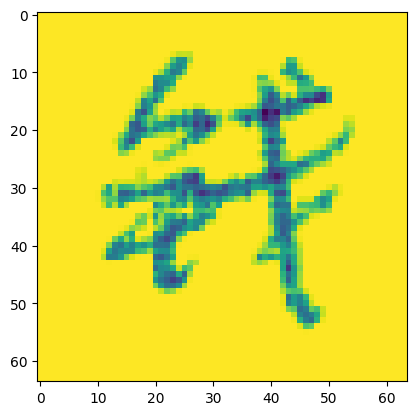

In [ ]:
plt.imshow(images_train[11324], interpolation='nearest')
plt.show()

In [ ]:
labels_train[11324]

163

In [ ]:
character_zip[163]

'钱'

# Data augmentation

In [23]:
SHUFFLE_BUFFER_SIZE = 256

In [24]:
def augment_data(X, Y):
  if tf.random.uniform(shape = []) < 0.5:
    X = 1.0 - X

  X = tf.image.random_contrast(X, 0.9, 1.1)
  X = tf.image.random_brightness(X, 0.05)

  return X, Y

In [25]:
def prepare_dataset(X, Y, batch_size = 32, shuffle = False, augment = False):
  ds_X = tf.data.Dataset.from_tensor_slices(X)
  ds_Y = tf.data.Dataset.from_tensor_slices(Y)
  ds   = tf.data.Dataset.zip((ds_X, ds_Y))

  if shuffle:
    ds = ds.shuffle(SHUFFLE_BUFFER_SIZE)

  if augment:
    ds = ds.map(augment_data, num_parallel_calls = tf.data.AUTOTUNE)

  ds = ds.batch(batch_size)

  ds = ds.prefetch(buffer_size = tf.data.AUTOTUNE)

  return ds

In [26]:
#train_ds = prepare_dataset(images_train_100, labels_train_100, batch_size = 32, shuffle = True, augment = True)
#valid_ds = prepare_dataset(images_valid_100, labels_valid_100, batch_size = 32)

train_ds = prepare_dataset(images_train, labels_train, batch_size = 16, shuffle = True, augment = True)
valid_ds = prepare_dataset(images_valid, labels_valid, batch_size = 16)

In [27]:
for x in train_ds.take(2):
  print(x[0].shape)
  print(x[1].shape)

  #plt.imshow(x[0][0])

(16, 64, 64, 1)
(16,)
(16, 64, 64, 1)
(16,)


# Analyse model results

In [28]:
def show_train_summary(model_name, history, epochs):
  history_dict = history.history

  fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Train/Val accuracy", "Train/Val loss"))

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["accuracy"],
                           mode = "lines+markers",
                           name = "Train Accuracy"),
                           row = 1, col = 1)

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["val_accuracy"],
                           mode = "lines+markers",
                           name = "Validation Accuracy"),
                           row = 1, col = 1)

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["loss"],
                           mode = "lines+markers",
                           name = "Train Loss"),
                           row = 1, col = 2)

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["val_loss"],
                           mode = "lines+markers",
                           name = "Validation Loss"),
                           row = 1, col = 2)

  fig.update_layout(height = 500, width = 1100,
                    title_text = f"Model {model_name} training summary",
                    title_x = 0.5,
                    title_xanchor = 'center',
                    legend = dict(
                        orientation = 'h',
                        yanchor = 'bottom',
                        y = -0.2,
                        xanchor = 'center',
                        x = 0.5
        ))
  fig.update_xaxes(title_text = "Epochs")
  fig.update_yaxes(title_text = "Accuracy", row = 1, col = 1)
  fig.update_yaxes(title_text = "Loss", row = 1, col = 2)

  fig.show()

In [29]:
def analyse_results(pred_class, true_class, key_dict, n_errors):
  class_names = [key_dict[i] for i in range(1, 173)]

  matrix_confusion = confusion_matrix(true_class, pred_class)
  df_confusion     = pd.DataFrame(matrix_confusion, index = class_names, columns = class_names)

  errors                = df_confusion.sum(axis = 1) - np.diag(df_confusion)
  wrong_classes_indices = np.where(errors > n_errors)[0]

  for index in wrong_classes_indices:
      character   = class_names[index]
      error_count = errors.iloc[index]

      confused_with_indices = np.where(df_confusion.iloc[index] > 0)[0]
      confused_with         = [class_names[i] for i in confused_with_indices if i != index]

      print(f"Ієрогліф: {character}, Кількість помилок: {error_count}, Поплутані ієрогліфи: {', '.join(confused_with)}")

# Model Conv (2)

In [ ]:
model_conv = keras.models.Sequential([
    keras.layers.Input(shape = (64, 64, 1)),  # Explicit Input layer
    keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(173, activation='softmax')
])

In [ ]:
model_conv.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_conv.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 64, 64, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 173)                 │         708,781 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 773,293 (2.95 MB)

 Trainable params: 773,293 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_conv = model_conv.fit(train_ds, batch_size = 16, epochs = 30, validation_data = valid_ds)
history_conv

Epoch 1/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.5052 - loss: 2.2231 - val_accuracy: 0.8883 - val_loss: 0.4060
Epoch 2/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.8679 - loss: 0.4705 - val_accuracy: 0.9148 - val_loss: 0.3054
Epoch 3/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9026 - loss: 0.3393 - val_accuracy: 0.9260 - val_loss: 0.2731
Epoch 4/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9182 - loss: 0.2790 - val_accuracy: 0.9340 - val_loss: 0.2439
Epoch 5/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9273 - loss: 0.2461 - val_accuracy: 0.9335 - val_loss: 0.2511
Epoch 6/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9335 - loss: 0.2206 - val_accuracy: 0.9371 - val_loss: 0.2403
Epoch 7/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9407 - loss: 0.1969 - val_accuracy: 0.9394 - val_loss: 0.2417
Epoch 8/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9439 - loss: 0

In [ ]:
show_train_summary("CNN", history_conv, list(range(1, 30 + 1)))

In [ ]:
model_conv.save('/content/drive/MyDrive/Дипломна_робота/model_conv.keras')

In [ ]:
model_conv.evaluate(images_test, labels_test)

768/768 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9109 - loss: 0.5077


[0.5373899340629578, 0.9022265672683716]

In [ ]:
predictions_conv = model_conv.predict(images_test)

768/768 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [ ]:
pred_labels_conv = np.argmax(predictions_conv, axis = 1)

In [ ]:
analyse_results(pred_labels_conv, labels_test, key_dict_test, 19)

Ієрогліф: 买, Кількість помилок: 20, Поплутані ієрогліфи: 习, 关, 兴, 吗, 天, 子, 家, 是, 果, 没, 现, 系, 见, 识, 里
Ієрогліф: 今, Кількість помилок: 20, Поплутані ієрогліфи: 么, 人, 什, 会, 写, 分, 名, 子, 月, 爸
Ієрогліф: 作, Кількість помилок: 26, Поплутані ієрогліфи: 下, 什, 住, 你, 午, 后, 坐, 昨, 能, 话, 饭
Ієрогліф: 先, Кількість помилок: 23, Поплутані ієрогліфи: 七, 么, 几, 午, 多, 店, 明, 是, 气, 火, 爸, 生, 老, 见
Ієрогліф: 几, Кількість помилок: 39, Поплутані ієрогліфи: 七, 九, 儿, 八, 少, 见, 雨
Ієрогліф: 出, Кількість помилок: 23, Поплутані ієрогліфи: 上, 么, 去, 在, 坐, 妈, 少, 点, 热, 生, 的, 识, 这, 里, 饭
Ієрогліф: 同, Кількість помилок: 26, Поплутані ієрогліфи: 习, 回, 国, 日, 月
Ієрогліф: 名, Кількість помилок: 20, Поплутані ієрогліфи: 会, 先, 几, 分, 和, 多, 好, 怎, 气, 汉, 爱, 爸, 生, 衣, 见, 这
Ієрогліф: 商, Кількість помилок: 25, Поплутані ієрогліфи: 前, 同, 家, 的, 西, 请, 雨, 面, 高
Ієрогліф: 回, Кількість помилок: 20, Поплутані ієрогліфи: 四, 国, 日, 月, 的
Ієрогліф: 国, Кількість помилок: 26, Поплутані ієрогліфи: 同, 四, 回, 日, 月, 现, 西
Ієрогліф: 在, Кількість помилок: 20, Поплут

# Model Conv with more cannals (3)

In [ ]:
model_conv_c = tf.keras.models.Sequential([
    keras.layers.Input(shape = (64, 64, 1)),  # Explicit Input layer
    keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(173, activation='softmax')
])

In [ ]:
model_conv_c.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_conv_c.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 64, 64, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 173)                 │       1,417,389 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,674,413 (6.39 MB)

 Trainable params: 1,674,413 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_conv_c = model_conv_c.fit(train_ds, batch_size = 16, epochs = 30, validation_data = valid_ds)
history_conv_c

Epoch 1/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.5471 - loss: 1.9966 - val_accuracy: 0.8969 - val_loss: 0.3758
Epoch 2/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.8816 - loss: 0.4152 - val_accuracy: 0.9009 - val_loss: 0.3736
Epoch 3/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9119 - loss: 0.3050 - val_accuracy: 0.8961 - val_loss: 0.3910
Epoch 4/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9268 - loss: 0.2478 - val_accuracy: 0.9278 - val_loss: 0.2722
Epoch 5/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9352 - loss: 0.2141 - val_accuracy: 0.9329 - val_loss: 0.2714
Epoch 6/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9392 - loss: 0.1972 - val_accuracy: 0.9340 - val_loss: 0.2576
Epoch 7/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9467 - loss: 0.1755 - val_accuracy: 0.9392 - val_loss: 0.2646
Epoch 8/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9507 - loss: 0

In [ ]:
show_train_summary("CNN with more cannals", history_conv_c, list(range(1, 30 + 1)))

In [ ]:
model_conv_c.save('/content/drive/MyDrive/Дипломна_робота/model_conv_c.keras')

In [ ]:
model_conv_c.evaluate(images_test, labels_test)

768/768 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9185 - loss: 0.6674


[0.6512221097946167, 0.9170024991035461]

In [ ]:
predictions_conv_c = model_conv_c.predict(images_test)

768/768 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
pred_labels_conv_c = np.argmax(predictions_conv_c, axis=1)

In [ ]:
analyse_results(pred_labels_conv_c, labels_test, key_dict_test, 19)

Ієрогліф: 作, Кількість помилок: 27, Поплутані ієрогліфи: 下, 什, 住, 你, 午, 后, 好, 小, 昨, 能, 衣, 话
Ієрогліф: 儿, Кількість помилок: 26, Поплутані ієрогліфи: 七, 么, 八, 几
Ієрогліф: 出, Кількість помилок: 24, Поплутані ієрогліфи: 七, 上, 么, 会, 北, 去, 回, 她, 少, 生, 的, 识, 说, 这, 里, 钱
Ієрогліф: 同, Кількість помилок: 26, Поплутані ієрогліфи: 习, 回, 日, 月, 汉
Ієрогліф: 商, Кількість помилок: 21, Поплутані ієрогліфи: 同, 雨, 面, 高
Ієрогліф: 四, Кількість помилок: 27, Поплутані ієрогліфи: 几, 回, 怎, 日, 月, 西
Ієрогліф: 国, Кількість помилок: 33, Поплутані ієрогліфи: 同, 四, 回, 日, 月, 朋, 都, 雨
Ієрогліф: 在, Кількість помилок: 21, Поплутані ієрогліфи: 七, 三, 不, 东, 九, 书, 五, 什, 住, 名, 后, 店, 有, 本, 生, 老, 西, 车, 钱
Ієрогліф: 大, Кількість помилок: 22, Поплутані ієрогліфи: 七, 不, 人, 先, 六, 去, 友, 天, 太, 机, 水, 火
Ієрогліф: 年, Кількість помилок: 29, Поплутані ієрогліфи: 作, 写, 午, 名, 日, 生, 系, 苹, 车
Ієрогліф: 日, Кількість помилок: 21, Поплутані ієрогліфи: 四, 回, 月, 水, 语
Ієрогліф: 时, Кількість помилок: 21, Поплутані ієрогліфи: 回, 多, 对, 朋, 的
Ієрогліф: 明, 

# Model with GlobalAveragePooling2D (4)

In [ ]:
model_pool = tf.keras.models.Sequential([
    keras.layers.Input(shape = (64, 64, 1)),  # Explicit Input layer
    keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(173, activation='softmax')
])

In [ ]:
model_pool.compile(optimizer = tf.optimizers.Adam(),
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
model_pool.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 173)                 │          11,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,757 (295.93 KB)

 Trainable params: 75,757 (295.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_pool = model_pool.fit(train_ds, batch_size = 16, epochs = 15, validation_data = valid_ds)
history_pool

Epoch 1/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 727s 141ms/step - accuracy: 0.0661 - loss: 4.4194 - val_accuracy: 0.5242 - val_loss: 1.9957
Epoch 2/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 733s 139ms/step - accuracy: 0.3553 - loss: 2.4590 - val_accuracy: 0.7203 - val_loss: 1.2161
Epoch 3/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 720s 140ms/step - accuracy: 0.4845 - loss: 1.8947 - val_accuracy: 0.8002 - val_loss: 0.8802
Epoch 4/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 742s 140ms/step - accuracy: 0.5447 - loss: 1.6548 - val_accuracy: 0.8376 - val_loss: 0.7018
Epoch 5/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 781s 147ms/step - accuracy: 0.5786 - loss: 1.5164 - val_accuracy: 0.8328 - val_loss: 0.7197
Epoch 6/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 766s 140ms/step - accuracy: 0.6035 - loss: 1.4217 - val_accuracy: 0.8579 - val_loss: 0.5730
Epoch 7/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 763s 148ms/step - accuracy: 0.6222 - loss: 1.3448 - val_accuracy: 0.8715 - val_loss: 0.5540
Epoch 8/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 762s 140ms/step - ac

In [ ]:
show_train_summary("GlobalAveragePooling2D", history_pool, list(range(1, 15 + 1)))

In [ ]:
model_pool.save('/content/drive/MyDrive/Дипломна_робота/model_pool.keras')

In [ ]:
model_pool.evaluate(images_test, labels_test)

768/768 ━━━━━━━━━━━━━━━━━━━━ 94s 123ms/step - accuracy: 0.8837 - loss: 0.4840


[0.5165100693702698, 0.8696218729019165]

In [ ]:
predictions_pool = model_pool.predict(images_test)

768/768 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step


In [ ]:
pred_labels_pool = np.argmax(predictions_pool, axis=1)

In [ ]:
analyse_results(pred_labels_pool, labels_test, key_dict_test, 19)

Ієрогліф: 三, Кількість помилок: 21, Поплутані ієрогліфи: 二, 五, 六, 子
Ієрогліф: 东, Кількість помилок: 33, Поплутані ієрогліфи: 下, 不, 书, 关, 再, 午, 去, 喜, 开, 本, 来, 米, 苹, 茶, 菜, 车
Ієрогліф: 今, Кількість помилок: 22, Поплутані ієрогліфи: 三, 么, 会, 分, 名, 后, 多, 少, 气
Ієрогліф: 住, Кількість помилок: 24, Поплутані ієрогліфи: 他, 你, 冷, 出, 名, 后, 在, 坐, 有, 气, 点, 爸, 生, 租, 话
Ієрогліф: 作, Кількість помилок: 21, Поплутані ієрогліфи: 不, 什, 住, 你, 冷, 后, 师, 店, 怎, 昨, 样
Ієрогліф: 做, Кількість помилок: 30, Поплутані ієрогліфи: 他, 候, 呢, 好, 妈, 很, 服, 没, 的, 租, 脑, 话, 饭, 馆
Ієрогліф: 先, Кількість помилок: 22, Поплутані ієрогліфи: 七, 么, 书, 亮, 关, 出, 午, 吃, 在, 坐, 子, 字, 怎, 月, 气, 爸, 电, 觉
Ієрогліф: 兴, Кількість помилок: 26, Поплутані ієрогліфи: 上, 不, 买, 六, 关, 前, 去, 没, 点, 识
Ієрогліф: 写, Кількість помилок: 29, Поплутані ієрогліфи: 习, 了, 再, 分, 去, 名, 吗, 呢, 喝, 回, 国, 多, 好, 子, 字, 我, 西, 见, 车, 飞
Ієрогліф: 分, Кількість помилок: 32, Поплутані ієрогліфи: 么, 习, 书, 今, 先, 六, 写, 出, 午, 名, 后, 和, 多, 字, 家, 少, 日, 气, 点, 的
Ієрогліф: 同, Кількість помило

# Model with GlobalAveragePooling2D (4)

In [ ]:
model_pool = tf.keras.models.Sequential([
    keras.layers.Input(shape = (64, 64, 1)),  # Explicit Input layer
    keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(173, activation='softmax')
])

In [ ]:
model_pool.compile(optimizer = tf.optimizers.Adam(),
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
model_pool.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 173)                 │          11,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,757 (295.93 KB)

 Trainable params: 75,757 (295.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_pool = model_pool.fit(train_ds, batch_size = 16, epochs = 30, validation_data = valid_ds)
history_pool

Epoch 1/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.0408 - loss: 4.7440 - val_accuracy: 0.5238 - val_loss: 2.1658
Epoch 2/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.3518 - loss: 2.4877 - val_accuracy: 0.7412 - val_loss: 1.1679
Epoch 3/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.5001 - loss: 1.8416 - val_accuracy: 0.8004 - val_loss: 0.8356
Epoch 4/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.5715 - loss: 1.5658 - val_accuracy: 0.8228 - val_loss: 0.7656
Epoch 5/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6036 - loss: 1.4284 - val_accuracy: 0.8519 - val_loss: 0.6096
Epoch 6/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.6350 - loss: 1.3162 - val_accuracy: 0.8664 - val_loss: 0.5516
Epoch 7/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6489 - loss: 1.2453 - val_accuracy: 0.8725 - val_loss: 0.5170
Epoch 8/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.6628 - loss: 1

In [ ]:
show_train_summary("GlobalAveragePooling2D", history_pool, list(range(1, 30 + 1)))

In [ ]:
model_pool.save('/content/drive/MyDrive/Дипломна_робота/model_pool.keras')

In [ ]:
model_pool.evaluate(images_test, labels_test)

768/768 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8934 - loss: 0.4311


[0.42237669229507446, 0.8917246460914612]

In [ ]:
predictions_pool = model_pool.predict(images_test)

768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
pred_labels_pool = np.argmax(predictions_pool, axis=1)

In [ ]:
analyse_results(pred_labels_pool, labels_test, key_dict_test, 19)

Ієрогліф: 三, Кількість помилок: 30, Поплутані ієрогліфи: 二, 五, 六, 气, 飞
Ієрогліф: 东, Кількість помилок: 26, Поплутані ієрогліфи: 不, 关, 再, 午, 子, 对, 小, 怎, 打, 本, 来, 系, 菜, 车
Ієрогліф: 二, Кількість помилок: 23, Поплутані ієрогліфи: 一, 三, 上, 五, 字, 家, 工
Ієрогліф: 五, Кількість помилок: 20, Поплутані ієрогліфи: 三, 上, 买, 出, 喜, 子, 工, 是, 生, 西, 起, 这, 里
Ієрогліф: 些, Кількість помилок: 20, Поплутані ієрогліфи: 冷, 出, 吃, 坐, 她, 学, 点, 生, 钱, 飞
Ієрогліф: 今, Кількість помилок: 24, Поплутані ієрогліфи: 么, 会, 冷, 分, 字, 爸
Ієрогліф: 住, Кількість помилок: 22, Поплутані ієрогліфи: 作, 你, 做, 名, 在, 坐, 好, 年, 店, 怎, 爸, 生, 的, 租, 站, 脑, 话
Ієрогліф: 作, Кількість помилок: 33, Поплутані ієрогліфи: 什, 他, 住, 你, 候, 午, 后, 和, 师, 年, 怎, 昨, 样, 识, 馆
Ієрогліф: 写, Кількість помилок: 31, Поплутані ієрогліфи: 买, 了, 出, 分, 吃, 名, 吗, 喝, 回, 多, 妈, 子, 岁, 年, 校, 电, 见, 语
Ієрогліф: 几, Кількість помилок: 22, Поплутані ієрогліфи: 么, 儿, 八, 出, 好, 日, 电, 见
Ієрогліф: 北, Кількість помилок: 24, Поплутані ієрогліфи: 九, 儿, 和, 她, 好, 时, 机, 欢, 水, 热, 现, 站, 老, 见
Ієр

# Model

In [30]:
# Set the number of class symbols (output classes)
number_class_symbols = 172  # Replace this with your actual number of classes

# Define input layer
inputs = layers.Input(shape=(64, 64, 1))  # Grayscale image of shape 64x64
model =  models.Sequential([
    layers.Input(shape = (64, 64, 1)),
    layers.Conv2D(64, kernel_size=7, activation='relu', padding = 'same'),
    layers.Conv2D(96, kernel_size=7, activation='relu', padding = 'same'),
    layers.Conv2D(128, kernel_size=5, activation='relu', padding = 'same'),
    layers.Conv2D(128, kernel_size=5, activation='relu', padding = 'same'),
    layers.Conv2D(256, kernel_size=3, activation='relu', padding = 'same'),
    layers.Conv2D(256, kernel_size=3, activation='relu', padding = 'same'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(256, kernel_size=3, activation='relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, kernel_size=3, activation='relu', padding = 'same'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(32, activation='gelu'),
    layers.Dropout(0.1),
    layers.Dense(number_class_symbols, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 96)          │         301,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │         307,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 172)                 │           5,676 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,101,740 (11.83 MB)

 Trainable params: 3,101,228 (11.83 MB)

 Non-trainable params: 512 (2.00 KB)

In [32]:
model.compile(optimizer = tf.optimizers.Adam(),
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, batch_size = 16, epochs = 20, validation_data = valid_ds)
history

Epoch 1/20
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 684s 128ms/step - accuracy: 0.0117 - loss: 5.0480 - val_accuracy: 0.0432 - val_loss: 4.4583
Epoch 2/20
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 632s 123ms/step - accuracy: 0.0655 - loss: 4.2814 - val_accuracy: 0.2039 - val_loss: 3.5475
Epoch 3/20
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 682s 123ms/step - accuracy: 0.2170 - loss: 3.3925 - val_accuracy: 0.4333 - val_loss: 2.4671
Epoch 4/20
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 683s 123ms/step - accuracy: 0.3996 - loss: 2.4871 - val_accuracy: 0.6060 - val_loss: 1.7171
Epoch 5/20
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 684s 123ms/step - accuracy: 0.5272 - loss: 1.9175 - val_accuracy: 0.7004 - val_loss: 1.3545
Epoch 6/20
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 682s 123ms/step - accuracy: 0.6108 - loss: 1.5686 - val_accuracy: 0.7547 - val_loss: 1.0785
Epoch 7/20
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 682s 123ms/step - accuracy: 0.6790 - loss: 1.2961 - val_accuracy: 0.8257 - val_loss: 0.8389
Epoch 8/20
3332/5148 ━━━━━━━━━━━━━━━━━━━━ 3:32 117ms/step - ac

In [1]:
show_train_summary("CNN Model", history, list(range(1, 15 + 1)))

NameError: name 'show_train_summary' is not defined

In [ ]:
model_pool.save('/content/drive/MyDrive/Дипломна_робота/model.keras')

In [ ]:
predictions = model.predict(images_test)

In [ ]:
pred_labels = np.argmax(predictions, axis=1)

In [ ]:
analyse_results(pred_labels, labels_test, character_dict, 19)

NameError: name 'analyse_results' is not defined